# LGM VIP in Data Science




# AUTHOR : Tanmay Sinha

# (02) INTERMEDIATE LEVEL TASK



# (2) Prediction using Decision Tree Algorithm :-




# Create the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


# Watch Tutorial from here :

https://youtu.be/CBCfOTePVPo

Dataset : https://bit.ly/3kXTdox

In [6]:
#Load Important Libraries

import os # os is built in module.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
print(dir())

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'np', 'os', 'pd', 'plt', 'quit', 'sns']


In [3]:
print(os.getcwd) # Current working directory(cwd)



<built-in function getcwd>


In [8]:
print(os.listdir())

['.ipynb_checkpoints', 'Iris.csv', 'MakeDirrectory', 'Prediction using Decision Tree  Algorithm .ipynb']


# Set Working Directory 

### Python os.chdir() Method :- Python method chdir() changes the current working directory to the given path.


### chdir() method :−  os.chdir(path)

In [9]:
# os.mkdir("D:\DATA Analytics LGM VIP INTERN_Project\(6) Prediction using Decision Tree Algorithm")

os.mkdir("D:\DATA Analytics LGM VIP INTERN_Project\(6) Prediction using Decision Tree Algorithm\MakeDirrectory")

In [10]:
os.getcwd()

'D:\\DATA Analytics LGM VIP INTERN_Project\\(6) Prediction using Decision Tree Algorithm'

#### Load The data 

In [12]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Descriptive Statistics 

In [15]:
data.shape

(150, 6)

In [16]:
#drop the ID column

# data = data.drop("Id", axis=1)

data.drop('Id',axis=1)

 


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
data.describe().style.background_gradient(cmap = 'copper')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Missing Value Analysis 

In [19]:
missing_val = data.isna().sum()
missing_val

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No Missing Value

# Exploratory Data Analysis(EDA) :- 

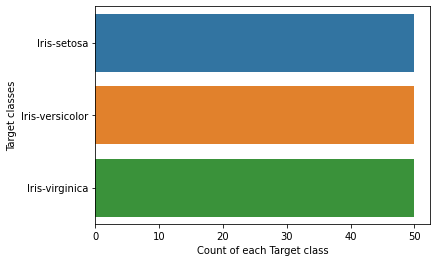

In [21]:
# target Class Count
sns.countplot(y=data.Species ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

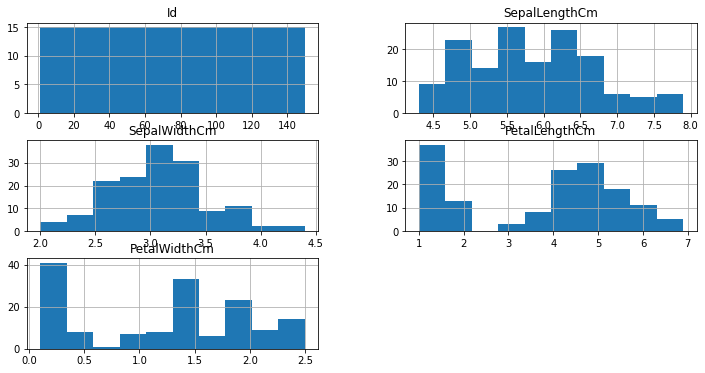

In [22]:
#Distribution of length & Width

data.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

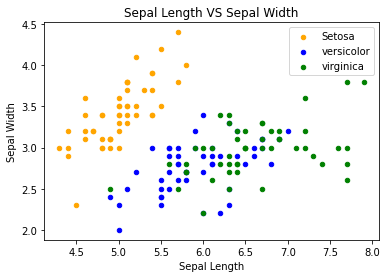

In [25]:
#Sepal Length VS Sepal Width
fig = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")
plt.show()

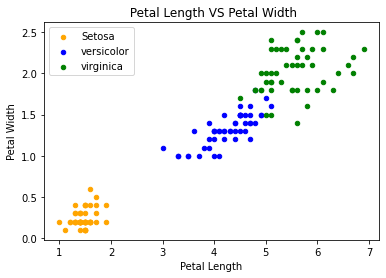

In [26]:
#Petal Length VS Petal Width
fig = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Petal Width")
plt.show()

we can see that the Petal Features are giving a better cluster division compared to the Sepal features.  

#### Correlation Analysis 

In [27]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


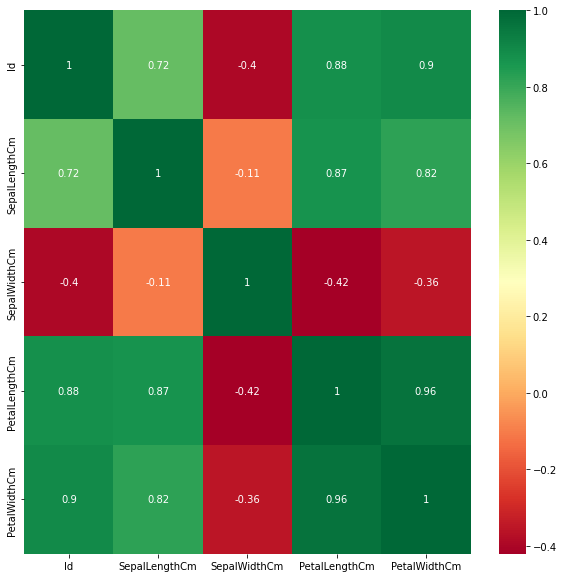

In [28]:
plt.figure(figsize=(10,10))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn') 

### Machine Learning 

#### Label Encoding the target class as ML deals only with Numerical features 

In [29]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data['Species']= label_encoder.fit_transform(data['Species'])
 
data['Species'].unique()

array([0, 1, 2])

### Train Test Split 

In [30]:
# Dividing data into Train and Test
from sklearn.model_selection import train_test_split , cross_val_score
X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Scaling The Data 

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### DecisionTreeClassifier 

In [32]:
from sklearn.tree import DecisionTreeClassifier

dfc = DecisionTreeClassifier()
dfc.fit(X_train, y_train)
y_pred = dfc.predict(X_test)

### Model Evaluation 

[[18  0  0]
 [ 0 10  0]
 [ 0  0 17]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



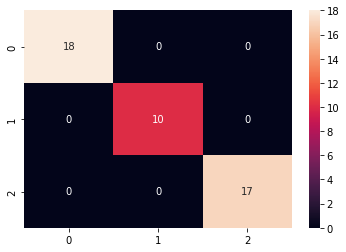

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Graphical Representation 

[Text(200.88000000000002, 181.2, 'X[0] <= 0.613\ngini = 0.663\nsamples = 105\nvalue = [32, 40, 33]'),
 Text(133.92000000000002, 108.72, 'X[0] <= -0.594\ngini = 0.494\nsamples = 72\nvalue = [32, 40, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

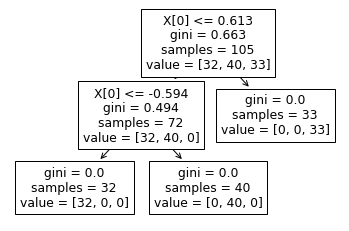

In [34]:
from sklearn import tree
tree.plot_tree(dfc) 

# Visualizing Decision Tree using graphviz library 

In [35]:
!pip install graphviz

In [36]:

import graphviz

dot_data = tree.export_graphviz(dfc, out_file = None)

graph = graphviz.Source(dot_data)

print(graph)


digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.613\ngini = 0.663\nsamples = 105\nvalue = [32, 40, 33]"] ;
1 [label="X[0] <= -0.594\ngini = 0.494\nsamples = 72\nvalue = [32, 40, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}
